<a href="https://colab.research.google.com/github/ChetanJadhav2341/Play-Store-App-Review-Analysis-EDA-/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **#  Importing Libraries**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing Data Set
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
file_path='/content/drive/MyDrive/EDA/Play Store App Review Analysis/Play Store Data.csv'

In [4]:
playstore_df = pd.read_csv(file_path)

# **B. Examine and read the Data Summary**

In [5]:
# Verify the type of data we are going to study
type(playstore_df)

pandas.core.frame.DataFrame

In [6]:
# Inspecting the first five rows of the Data set 
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
playstore_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6474,Mobilight-BM,FINANCE,4.8,6,6.2M,500+,Free,0,Everyone,Finance,"August 3, 2018",2.0.10,4.0.3 and up
2418,IBM Micromedex Drug Info,MEDICAL,3.8,206,9.5M,"10,000+",Paid,$2.99,Everyone,Medical,"April 25, 2018",1.17.0,4.0 and up
7469,Brainf*ck Interpreter,FAMILY,4.0,24,1.9M,"1,000+",Free,0,Mature 17+,Entertainment,"September 3, 2016",1.0.6,2.3 and up
4287,K PLUS,FINANCE,4.4,124324,Varies with device,"10,000,000+",Free,0,Everyone,Finance,"June 26, 2018",4.6.0,4.2 and up
3026,SwingAid - Level up Golf,SPORTS,4.3,752,33M,"100,000+",Free,0,Everyone,Sports,"July 10, 2018",2.6.3,4.1 and up


In [8]:
# Printing The shape oF Data set
playstore_df.shape

(10841, 13)

# We have total 10841 Rows and 13 Columns in the Data Set.

In [9]:
# Printing the information of Dataset to get the better idea of Data type and Memory use 
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


-The info() function is used to print a brief summary of a DataFrame which prints the shape of
data i.e. number of rows(entries) and number of columns.This method prints information
about a Data Frame including the index dtype and column dtypes, non-null counts and
memory usage.


In [10]:
# Printing the Statistics summary
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


-The describe() method is used for calculating some statistical data like percentile, mean and
std of the numerical values of the Series or DataFrame. It analyzes both numeric and object
series and also the DataFrame column sets of mixed data types.


# **C. Data Cleaning**

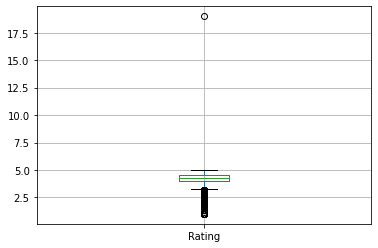

In [11]:
# lets plot a Box plot for rating column to get some idea about the rating columns
playstore_df.boxplot();

A box plot is a method for graphically depicting groups of numerical data through their
quartiles.This represents the average of this numerical data.
-From above observasion we can see there are values which are greater than 5. The rating of
every app has to be max 5 and not greater than it so lets try to find out this outlier.

In [12]:
# Checking how many outliers are there in Rating column and lets find out which row it is
playstore_df[playstore_df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
# The category, Rating and Reviews Column have irregular data so i'am dropping this row having an index 10472

playstore_df.drop([10472], inplace=True)

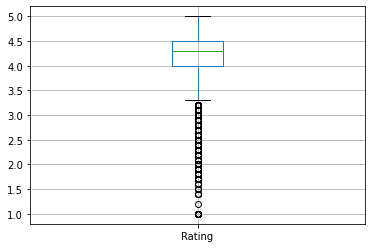

In [14]:
# Lets check do i successfully droped the unwanted column

playstore_df.boxplot();

# **D. Data Processing**

# Handling Data Types of each Feature

In [15]:
playstore_df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [16]:
playstore_df['Reviews'].value_counts

<bound method IndexOpsMixin.value_counts of 0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: object>

In [17]:
# 1) clean the 'Reviews' data and change the type 'object' to 'float'

reviews = [i for i in playstore_df['Reviews']]

def clean_reviews(reviews_list):
  '''
  As 'M' has been found the in reviews data, this function replace it with million
  '''
  cleaned_data=[]
  for review in reviews_list:
    if 'M' in review:
      review=review.replace('M', '')
      review=float(review)*100000  # 1M=1000000
    cleaned_data.append(review)
  return cleaned_data

playstore_df['Reviews']=clean_reviews(reviews)
playstore_df['Reviews']=playstore_df['Reviews'].astype(float)


Other Features like Size, Installs, Price and Android Vers also must be of numeric type. The
values they are holding must be changed to a proper format so that we can use them for
analysis and plots. Example : '10000+' to 10000


In [18]:
playstore_df['Size'].value_counts

<bound method IndexOpsMixin.value_counts of 0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10840, dtype: object>

In [19]:
playstore_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [20]:
# 2) clean the 'Size' data and change the type 'object' to 'float'

# found value with '1,000+' in one of record, remove it from data_frame as uncertain whether it is 'M' or 'k'

index = playstore_df[playstore_df['Size']== '1,00+'].index
playstore_df.drop(axis=0, inplace=True, index=index)

sizes = [i for i in playstore_df['Size']]

def clean_sizes(sizes_list):
  """
  As sizes are represented in 'M' and 'K', we remove 'M' 
  and convert 'K'/ kilobytes into megabytes
  """
  cleaned_data = []
  for size in sizes_list:
    if 'M' in size:
      size = size.replace('M', '')
      size = float(size)
    elif 'k' in size:
      size = size.replace('k','')
      size = float(size)
      size = size/1024   # 1 megabyte =1024 kilobytes
   # representing 'Varies with device' with value 0
    elif 'Varies with device' in size:
      size = float(0)
    cleaned_data.append(size)
  return cleaned_data

playstore_df['Size']= clean_sizes(sizes)
playstore_df['Size']= playstore_df['Size'].astype(float) 

In [21]:
playstore_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [22]:
playstore_df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [23]:
#  3) clean the 'Installs' data and change the type 'object' to 'float'

installs = [i for i in playstore_df['Installs']]

def clean_installs(installs_list):
  cleaned_data = []
  for install in installs_list:
    if ',' in install:
      install = install.replace(',','')
    if 'Free' in install:
      install = install.replace('Free','0')
    if ' ' in install:
      install = install.replace(' ','')
    if '+' in install:
      install = install.replace('+','')
    install = int(install)
    cleaned_data.append(install)
  return cleaned_data

playstore_df['Installs']= clean_installs(installs)
playstore_df['Installs']= playstore_df['Installs'].astype(float)

In [24]:
playstore_df['Price'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10840, dtype: object>

In [25]:
playstore_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [26]:
playstore_df['Price'].nunique()

92

In [27]:
# 4) clean the 'Price' data and change the type 'object' to 'float'

prices=[i for i in playstore_df['Price']]

def clean_prices(price_list):
  cleaned_data =[]

  for price in price_list:
    if '$' in price:
      price=price.replace('$','')
    if ' ' in price:
      price=price.replace(' ','')
    if 'Everyone' in price:
      price=price.replace('Everyone','0')
    cleaned_data.append(price)
  return cleaned_data

playstore_df['Price']=clean_prices(prices)
playstore_df['Price']=playstore_df['Price'].astype(float)

In [28]:
# look at the random 10 records in the apps dataframe to verify the cleaned columns
playstore_df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1916,Doodle Jump,GAME,4.3,1083571.0,0.000000,50000000.0,Free,0.0,Everyone,Arcade,"July 20, 2018",Varies with device,Varies with device
9928,EU Whoiswho,BUSINESS,NaN,0.0,2.700000,10.0,Free,0.0,Everyone,Business,"December 1, 2016",0.0.1,4.0 and up
6239,BH - Fitness & Nutrition,HEALTH_AND_FITNESS,NaN,0.0,43.000000,1.0,Free,0.0,Everyone,Health & Fitness,"July 4, 2018",4.3.6,4.1 and up
6026,BD All Results,FAMILY,4.1,205.0,7.300000,50000.0,Free,0.0,Everyone,Education,"November 29, 2017",9.0,4.0.3 and up
9450,Super Sport Car Simulator,FAMILY,4.2,58553.0,50.000000,1000000.0,Free,0.0,Everyone,Simulation,"December 25, 2016",3.1,2.3.3 and up
3986,Clash of Clans,FAMILY,4.6,44881447.0,98.000000,100000000.0,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
8888,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.0,1.0,2.900000,100.0,Free,0.0,Everyone,Art & Design,"April 18, 2018",1.0.2,4.0 and up
6902,BW-DGS plugin,GAME,4.5,70.0,0.674805,1000.0,Free,0.0,Everyone,Board,"May 13, 2018",1.6.0,4.0 and up
10814,FR: My Secret Pets!,FAMILY,4.0,785.0,31.000000,50000.0,Free,0.0,Teen,Entertainment,"June 3, 2015",1.3.1,3.0 and up
1461,Gold Butterfly Keyboard Theme,HOUSE_AND_HOME,4.3,10054.0,9.100000,1000000.0,Free,0.0,Everyone,House & Home,"July 12, 2018",6.7.12.2018,4.0.3 and up


In [29]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.4+ MB


# Handling null values in Data

In [30]:
# counting the number of missing values in the dataframe format
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Here, we realized that there are 1474 rows having null values under column 'Rating'. Hence,
we decided to replace the null values with median of overall 'Rating' values.

In [31]:
def replace_with_median(series):
  '''

  Given a series, replace the rows with null values 
  to median values

  '''

  return series.fillna(series.median())

playstore_df['Rating']=playstore_df['Rating'].transform(replace_with_median)
playstore_df['Rating']=playstore_df['Rating'].astype(float)

Then we apply mode for the Current_Ver,Android__Ver and Type.

In [32]:
def replace_with_mode(series):
  '''

  Given a series, replace the rows with null values 
  to median values

  '''

  return series.fillna(series.mode())

playstore_df['Rating']=playstore_df['Rating'].transform(replace_with_mode)
playstore_df['Current Ver']=playstore_df['Current Ver'].transform(replace_with_mode)
playstore_df['Android Ver']=playstore_df['Android Ver'].transform(replace_with_mode)

In [33]:
playstore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [34]:
# count duplicate in 'App'
playstore_df['App'].duplicated().sum()

1181

In [35]:
#dropping duplicates value in 'App' column using drop_duplicates() function

playstore_df.drop_duplicates(subset='App', inplace=True)

In [36]:
#Lets check the modified data
playstore_df.shape

(9659, 13)

Hence we successfully droped all the duplicates values and Data is ready for analysis.

## **E. Exploratory Data Analysis and Visualization**

## **1.Find the percentage of app of top 25 and bottom 25 category.**

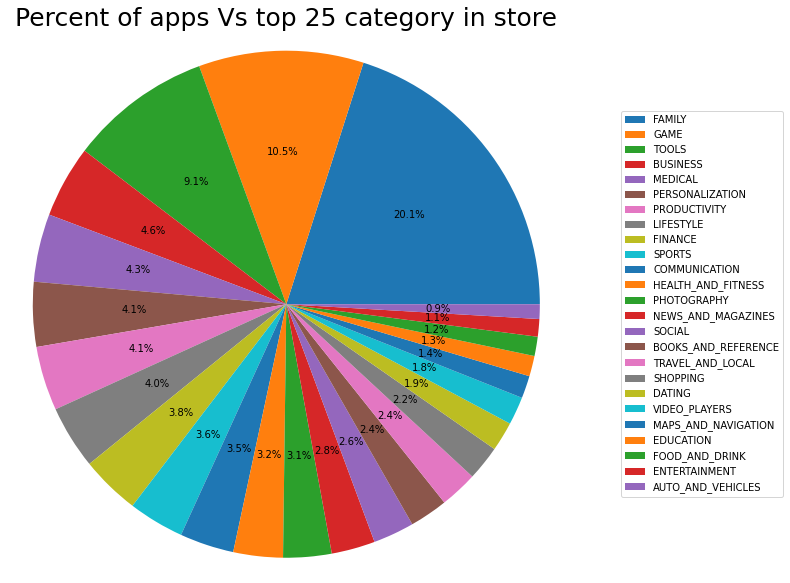

In [37]:
# Basic pie chart to view distribution of apps across top 25 categories

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

number_of_apps = playstore_df['Category'].value_counts().head(25)

labels = number_of_apps.index
sizes = number_of_apps.values


ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.title('Percent of apps Vs top 25 category in store',size = 25)
plt.show()

Hence we know that most of the apps in the play store are from the categories of 'Family',
'Game' and also 'Tools.

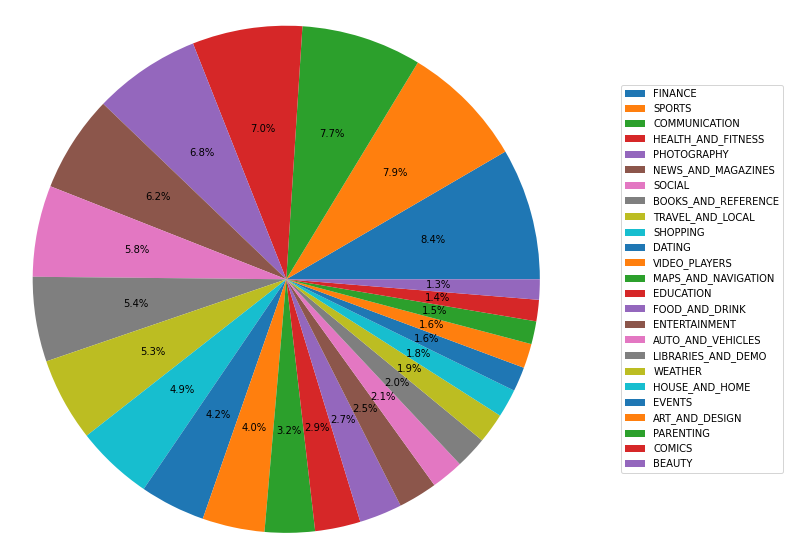

In [38]:
# Basic pie chart to view distribution of apps across last 25 categories

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

number_of_apps = playstore_df['Category'].value_counts().tail(25)

labels = number_of_apps.index
sizes = number_of_apps.values

ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.show()

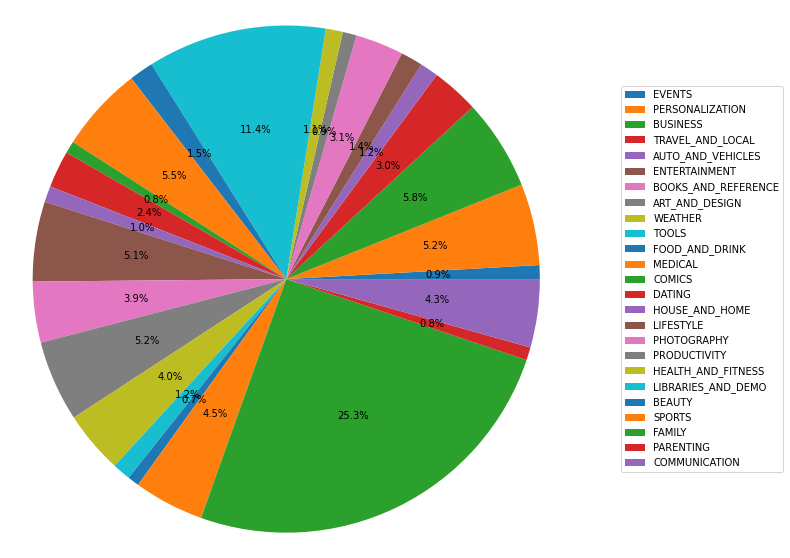

In [39]:
# Basic pie chart to view distribution of apps across Randomly 25 categories

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

number_of_apps = playstore_df['Category'].value_counts().sample(25)

labels = number_of_apps.index
sizes = number_of_apps.values

ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.show()

# 2. Study OF distribution of apps in term of their type i.e. free Vs paid.

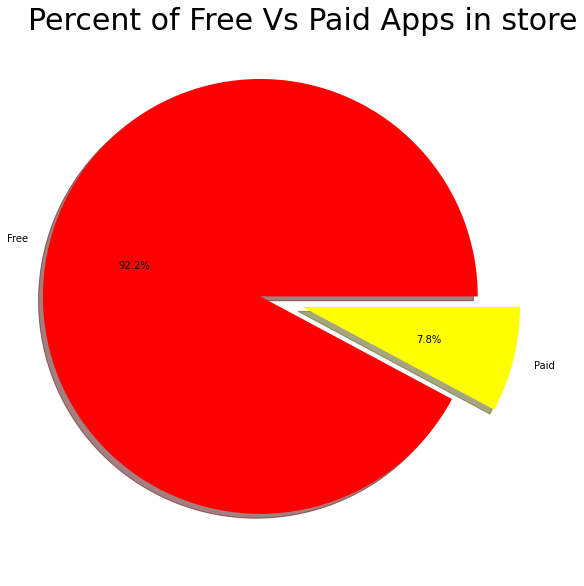

In [40]:
# Visualisation of free and paid apps on playstore

plt.figure(figsize=(10,10))

labels = playstore_df['Type'].value_counts(sort = True).index
sizes = playstore_df['Type'].value_counts(sort = True)
colors = ["red","yellow"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 30)
plt.show()

# Such that we can study there are approximate 92% apps are free and 7.8 % apps are paid.

# **3. Study OF distribution of average apps rating .**

In [41]:
# Average App Rating in each Category

avg_rating=playstore_df.groupby('Category')['Rating'].mean()
print(avg_rating)

Category
ART_AND_DESIGN         4.354687
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.334234
BUSINESS               4.173810
COMICS                 4.185714
COMMUNICATION          4.154921
DATING                 4.041520
EDUCATION              4.363866
ENTERTAINMENT          4.135294
EVENTS                 4.395313
FAMILY                 4.194378
FINANCE                4.138551
FOOD_AND_DRINK         4.192857
GAME                   4.249948
HEALTH_AND_FITNESS     4.251736
HOUSE_AND_HOME         4.174324
LIBRARIES_AND_DEMO     4.207143
LIFESTYLE              4.131436
MAPS_AND_NAVIGATION    4.062595
MEDICAL                4.202025
NEWS_AND_MAGAZINES     4.156693
PARENTING              4.300000
PERSONALIZATION        4.325532
PHOTOGRAPHY            4.166548
PRODUCTIVITY           4.206150
SHOPPING               4.237624
SOCIAL                 4.255230
SPORTS                 4.232923
TOOLS                  4.073881
TRAVEL_AND_LOCAL       4.103196

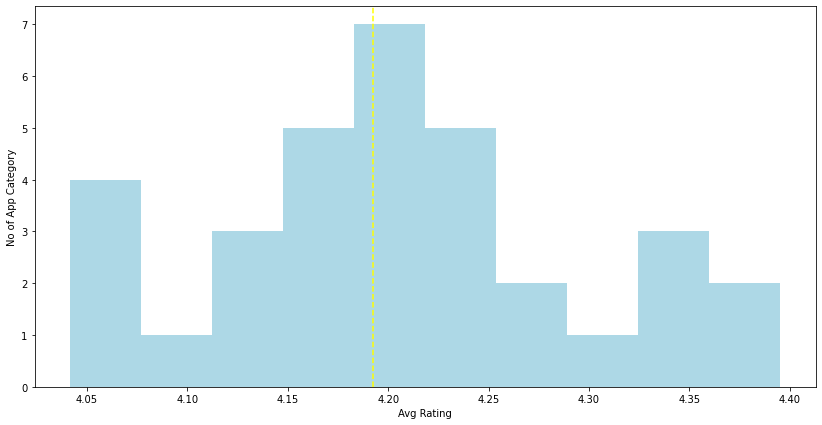

In [42]:
# Plot a histogram for Average Rating.

fig, ax = plt.subplots(figsize=(14,7))

ax.hist(avg_rating,color='lightblue')
ax.axvline(playstore_df['Rating'].mean(), color='yellow', linestyle='--')

plt.xlabel('Avg Rating')
plt.ylabel('No of App Category')
plt.show()

# **4. Study OF distribution of apps in term of their rating, size and type.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


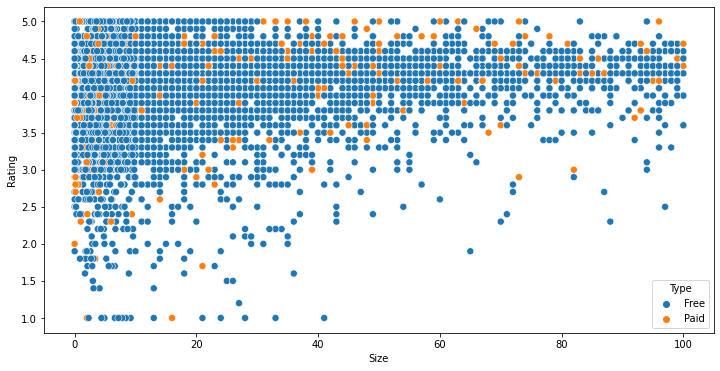

In [43]:
# show the distribution of apps in term of their rating, size and type.

plt.figure(figsize=(12,6))
sns.scatterplot(playstore_df['Size'], playstore_df['Rating'], hue=playstore_df['Type'], s=50)

From this scatter plot, we can imply that majority of the free apps are small in size and having
high rating. While for paid apps, we have quite equal distribution in term on size and rating.

## **5. Study OF distribution of apps in term of Content Rating.**

In [44]:
# Number of apps in terms of Content Rating.

content_rating=playstore_df['Content Rating'].value_counts()
content_rating

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

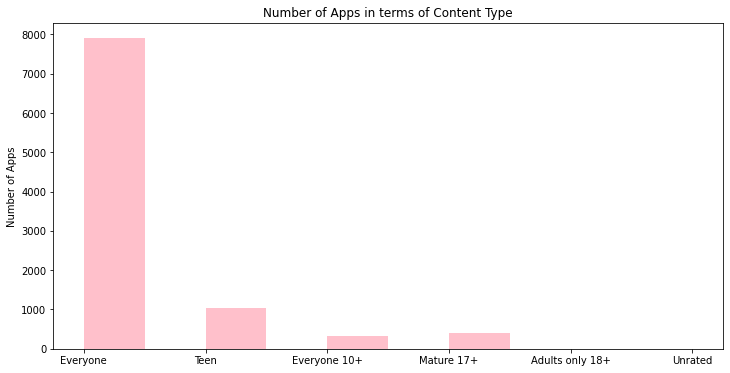

In [45]:
# Distribute the number of apps Vs their Content Rating.

fig = plt.figure(figsize=(12,6))
plt.hist(playstore_df['Content Rating'], color='pink')

plt.title('Number of Apps in terms of Content Type')
plt.ylabel('Number of Apps')
plt.show()
fig.savefig('Number of Apps in terms of Content Type')

# **6. Finding and Counting the numbers of 5 star rating apps.**

In [46]:
# No. of App having 5 star Rating.

full_rating=playstore_df[playstore_df.Rating == 5]
full_rating.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15.0,37.0,1000.0,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5.0,4.4,1000.0,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up
615,Awake Dating,DATING,5.0,2.0,70.0,100.0,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up
633,Spine- The dating app,DATING,5.0,5.0,9.3,500.0,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6.0,5.0,100.0,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up


In [47]:
# Number of apps having 5 star rating.

total_full_rating=full_rating['App'].count()
print(f'There are {total_full_rating} apps having 5 star rating. ')

There are 271 apps having 5 star rating. 


# **7. Analysing the distribution of Genres with Installs apps.**

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117]), <a list of 118 Text major ticklabel objects>)

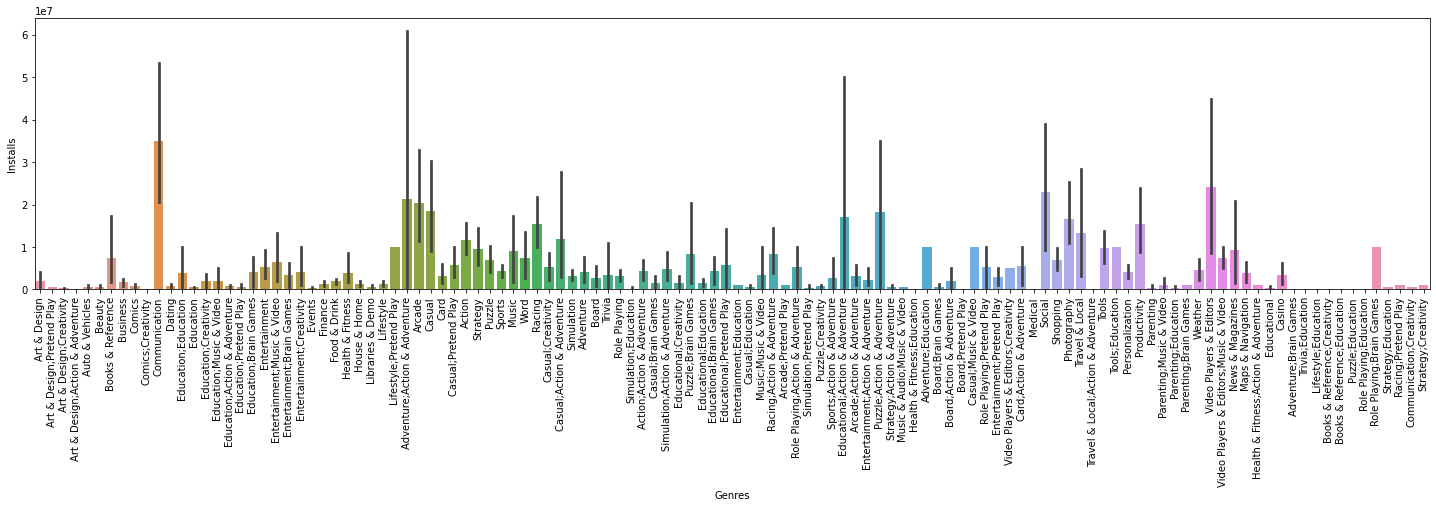

In [50]:
fig, ax=plt.subplots(figsize=(25,5))
sns.barplot(x='Genres', y='Installs', data=playstore_df, ax=ax)
plt.xticks(rotation=90)

# **8.Counting the number of installed apps in terms of each Category and Study the number of install apps with respect to number of user.**

In [51]:
# count total No Of Installation

users=playstore_df.groupby(['Category'])['Installs'].sum().reset_index()
users

,Category,Installs
0,ART_AND_DESIGN,1.143381e+08
1,AUTO_AND_VEHICLES,5.313021e+07
2,BEAUTY,2.719705e+07
3,BOOKS_AND_REFERENCE,1.665970e+09
4,BUSINESS,6.971649e+08
5,COMICS,4.498115e+07
6,COMMUNICATION,1.103828e+10
7,DATING,1.409261e+08
8,EDUCATION,3.529520e+08
9,ENTERTAINMENT,2.113660e+09


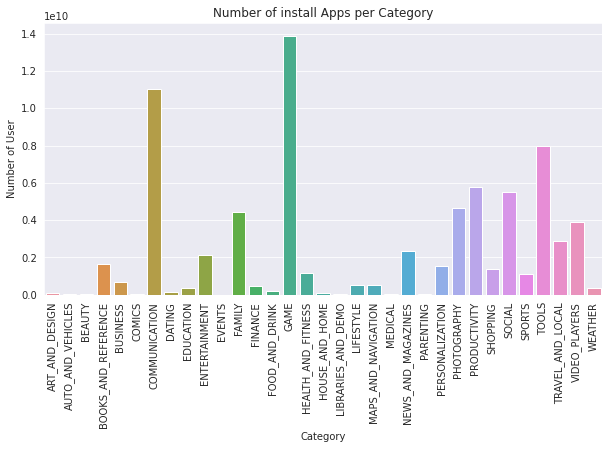

In [52]:
# Study the number of install apps with respect to number of user

sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(x='Category', y='Installs', data=users)
plt.title('Number of install Apps per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of User')
plt.show()

# **9. Find top 5 apps on the basis of highest installs.**

In [53]:
# Top 5 apps on the basis of highest installs

df = playstore_df.sort_values(by=['Installs'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,0.0,1.000000e+09,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264.0,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155.0,0.0,1.000000e+09,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device


# **10. Find top 5 most installed game.**

As before we see the most install category app is Game and now see top 5 games install by
users.

In [54]:
# What is the top 5 most installed apps in Game category?
# Top 5 popular game as for highest no of instalation
df = playstore_df[playstore_df['Category'] == 'GAME']
df = df.sort_values(by=['Installs'], ascending=False)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264.0,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677.0,74.0,5.000000e+08,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1661,Temple Run 2,GAME,4.3,8118609.0,62.0,5.000000e+08,Free,0.0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
1662,Pou,GAME,4.3,10485308.0,24.0,5.000000e+08,Free,0.0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
1722,My Talking Tom,GAME,4.5,14891223.0,0.0,5.000000e+08,Free,0.0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up


# **11. Find top 5 expensive apps.**

In [55]:
# What is the top 5 expensive apps?
df = playstore_df.sort_values(by=['Price'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.300000,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.3,0.0,40.000000,0.0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,0.942383,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5358,I am Rich!,FINANCE,3.8,93.0,22.000000,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36.0,41.000000,1000.0,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up


# **12. Camparing Rating given by user from each catagory.**

Avg rating:- 4.1924422818097105


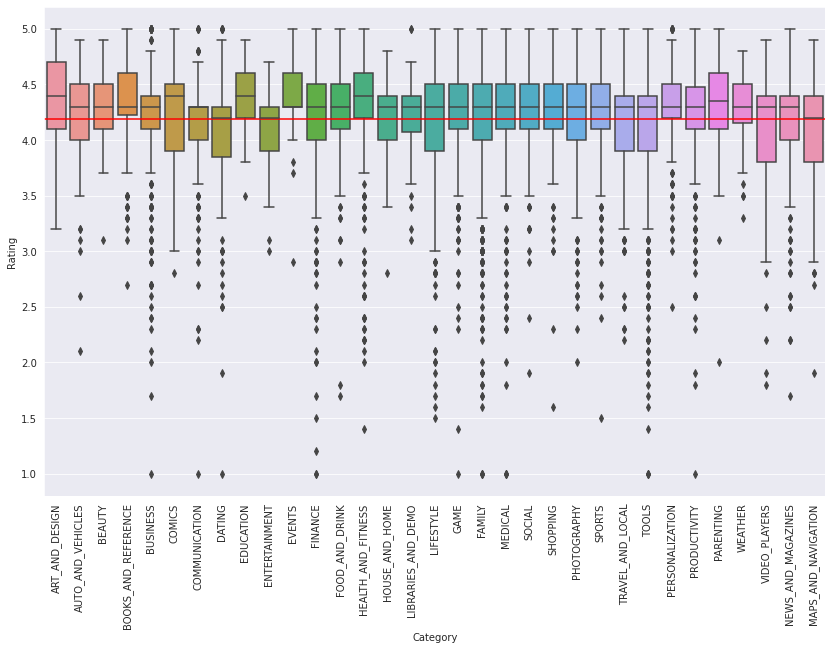

In [56]:

#Compare the app catagory wise with rating.here we an which catagory get more rating with avg and which is low

plt.figure(figsize=(14,9))

val = sns.boxplot(data=playstore_df, x="Category", y="Rating")
val.axhline(playstore_df['Rating'].mean(),ls="-",color="red")
x=plt.xticks(rotation=90)
print('Avg rating:-',playstore_df['Rating'].mean())

here we can study which catagory get more rating which average and which is low.

# **13. Showing Correlatation graph**

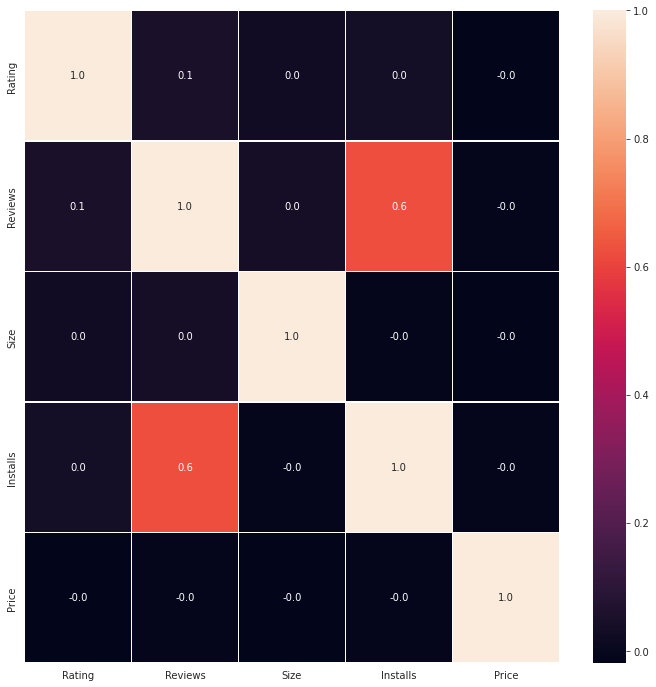

In [57]:
# Correlation with each catagory to other catagory by using heat map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(playstore_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

As we studied above map , it visualize the strength of relationships between numerical
variables. Correlation plots are used to understand which variables are related to each other
and the strength of this relationship with numerical value.


# **E. Lets start the study of User Review Data**

This file contains the result of the sentiment analysis conducted by the dataset creator. It has
64,295 rows of data with the following 5 number of columns:

-1. App : Name of the app.

-2. Translated_Review: Either the original review in English, or a translated version if the orignal
review is in another language.

-3. Sentiment: The result of the sentiment analysis conducted on a review. The value is either
Positive, Neutral, or Negative.

-4. Sentiment_Polarity: A value indicating the positivity or negativity of the sentiment, values
range from -1 (most negative) to 1 (most positive).

-5. Sentiment_Subjectivity: A value from 0 to 1 indicating the subjectivity of the review. Lower
values indicate the review is based on factual information, and higher values indicate the
review is based on personal or public opinions or judgements.

In [58]:
# Importing first Data Set
user_reviews = '/content/drive/MyDrive/EDA/Play Store App Review Analysis/User Reviews.csv'
playstore_df1 = pd.read_csv(user_reviews)
playstore_df1.dropna(inplace=True)

In [59]:
# Verify the type of data we are going to study
type(playstore_df1)

pandas.core.frame.DataFrame

In [60]:
# Inspecting the first five rows of the Data set 
playstore_df1.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000
10,10 Best Foods for You,good you.,Positive,0.70,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.20,0.100000


In [61]:
# Printing The shape oF Data set 
playstore_df1.shape

(37427, 5)

In [62]:
# Merge 'reviews'(playstore_df1) DataFrame with 'apps'(playstore_df) DataFrame to get 'merged_df'. We are going to use inner join for this operation
merged_df = pd.merge(playstore_df, playstore_df1, on='App', how = 'inner')
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


Here Data is now ready to Study.
